This is a quick pandas data analysis demonstration. For this we are using the Amazon Bestsellers data set from kaggle.

# Import Libraries

In [1]:
import pandas as pd


# 1. General

Let us start with a general overview of our data set

## Create DataFrame

In [2]:
df = pd.read_csv('amazon_books/bestsellers.csv')

In [3]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


The DataFrame object tells us, that we have 550 rows and 7 columns. The column on the very left is our index column.

You can also use the shape attribute of the DataFrame object to get this information.
## Display shape of the DataFrame


In [4]:
df.shape

(550, 7)

## Display 10 rows (index 0-9) with .head()

In [5]:
df.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


## To get a first impression of the data types you can use the .info() method
Note: you can think of the object data type as of strings

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


## I want to get some information about unique values in our Genres column

In [7]:
df['Genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

## Use the .describe() method to get basic statistical information about our data

In [8]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


## Simple DataFrame correlation

In [9]:
df.corr()

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


## Maximum values:

In [10]:
df.apply(pd.Series.max)

Name           You Are a Badass: How to Stop Doubting Your Gr...
Author                                              Zhi Gang Sha
User Rating                                                  4.9
Reviews                                                    87841
Price                                                        105
Year                                                        2019
Genre                                                Non Fiction
dtype: object

Information: Highest Price: 105, latest year; 2019, Most Reviews: 87841, Highest Rating (not weighted): 4.9

## Minimum values:

In [11]:
df.apply(pd.Series.min)

Name           10-Day Green Smoothie Cleanse
Author                      Abraham Verghese
User Rating                              3.3
Reviews                                   37
Price                                      0
Year                                    2009
Genre                                Fiction
dtype: object

Information: Lowest Rating: 3.3 (but still a bestseller!), Year: 2009, Lowest review count: 37

# 2. Edit Columns
I don't like the Name column, because it could be confusing (you could think of the authors name) and I also don't like spaces in column names, so lets change and save it quickly

In [12]:
df.rename(columns={'User Rating' : 'Rating', 'Name' : 'Book'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Book     550 non-null    object 
 1   Author   550 non-null    object 
 2   Rating   550 non-null    float64
 3   Reviews  550 non-null    int64  
 4   Price    550 non-null    int64  
 5   Year     550 non-null    int64  
 6   Genre    550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


# 3. Genres and Reviews
## Count single Genre values with the .value_counts() method on the series object

In [13]:
df['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

## Simple plotting with the .plot() method

<AxesSubplot:>

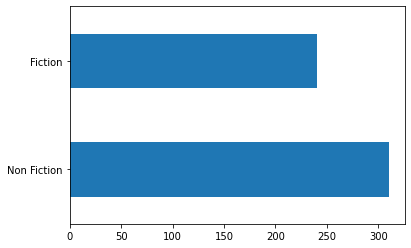

In [14]:
df['Genre'].value_counts().plot(kind='barh')

## Use normalize=True to get percentages

In [15]:
df['Genre'].value_counts(normalize=True)

Non Fiction    0.563636
Fiction        0.436364
Name: Genre, dtype: float64

<AxesSubplot:>

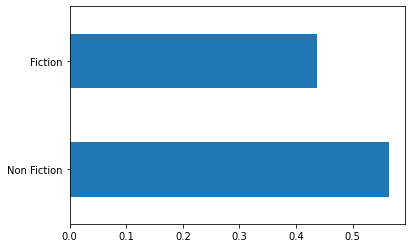

In [16]:
df['Genre'].value_counts(normalize=True).plot(kind='barh')

## Groupby Genre and calculate mean of Reviews

In [17]:
df.groupby(['Genre'])['Reviews'].mean()

Genre
Fiction        15683.791667
Non Fiction     9065.145161
Name: Reviews, dtype: float64

- There are more Non Fiction books in this Amazon Bestseller List from 2009-2019
- Fiction books got more reviews

# 4. Books
"Top Ten" of bestseller books from 2009-2019

<AxesSubplot:>

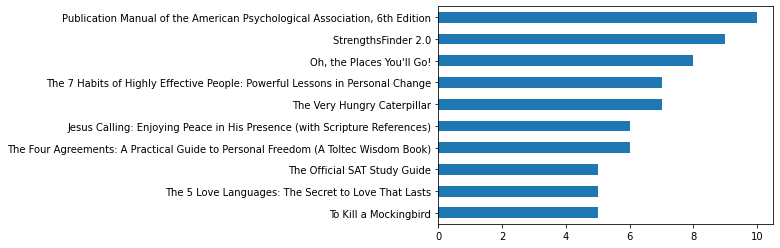

In [18]:
df['Book'].value_counts()[:10].sort_values(ascending=True).plot(kind='barh')

## Top Ten Number of reviews

In [19]:
df.groupby(['Book', 'Author', 'Genre'], as_index=False)['Reviews'].max().sort_values('Reviews', ascending=False).head(10)

,Book,Author,Genre,Reviews
342,Where the Crawdads Sing,Delia Owens,Fiction,87841
248,The Girl on the Train,Paula Hawkins,Fiction,79446
30,Becoming,Michelle Obama,Non Fiction,61133
104,Gone Girl,Gillian Flynn,Fiction,57271
240,The Fault in Our Stars,John Green,Fiction,50482
280,The Nightingale: A Novel,Kristin Hannah,Fiction,49288
88,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,Fiction,47265
276,The Martian,Andy Weir,Fiction,39459
19,All the Light We Cannot See,Anthony Doerr,Fiction,36348
220,The Alchemist,Paulo Coelho,Fiction,35799


You can see that 9/10 books with the highest number of reviews are fiction books! But there are more non fiction books in this data set!

In [20]:
books_by_author = df['Author'].value_counts()

In [21]:
books_by_author

Jeff Kinney                           12
Suzanne Collins                       11
Gary Chapman                          11
Rick Riordan                          11
American Psychological Association    10
                                      ..
Dave Ramsey                            1
Hopscotch Girls                        1
Paul Kalanithi                         1
Sara Gruen                             1
The Washington Post                    1
Name: Author, Length: 248, dtype: int64

Author with most book publications: Jeff Kinney with 12 books

In [22]:
df.groupby(['Author', 'Book'], as_index = False)[['Reviews']].max().sort_values('Reviews', ascending=False).head(10)


,Author,Book,Reviews
87,Delia Owens,Where the Crawdads Sing,87841
243,Paula Hawkins,The Girl on the Train,79446
231,Michelle Obama,Becoming,61133
128,Gillian Flynn,Gone Girl,57271
182,John Green,The Fault in Our Stars,50482
200,Kristin Hannah,The Nightingale: A Novel,49288
100,E L James,Fifty Shades of Grey: Book One of the Fifty Sh...,47265
15,Andy Weir,The Martian,39459
21,Anthony Doerr,All the Light We Cannot See,36348
245,Paulo Coelho,The Alchemist,35799


In [23]:
df.groupby(['Book'], as_index=False)[['Reviews']].mean().sort_values('Reviews', ascending=False).head(10)

,Book,Reviews
342,Where the Crawdads Sing,87841.0
248,The Girl on the Train,79446.0
30,Becoming,61133.0
104,Gone Girl,57271.0
240,The Fault in Our Stars,50482.0
280,The Nightingale: A Novel,49288.0
88,Fifty Shades of Grey: Book One of the Fifty Sh...,47265.0
276,The Martian,39459.0
19,All the Light We Cannot See,36348.0
220,The Alchemist,35799.0


# 4. Pricing

## Book with the highest price

In [24]:
df.groupby(['Book', 'Author', 'Genre'], as_index=False)['Price'].max().sort_values('Price', ascending=False).head(1)

,Book,Author,Genre,Price
56,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,Non Fiction,105


## Groupby Name, Author, Genre and calculate mean price

In [25]:
df.groupby(['Book', 'Author', 'Genre'], as_index=False)['Price'].mean()

,Book,Author,Genre,Price
0,10-Day Green Smoothie Cleanse,JJ Smith,Non Fiction,8.0
1,11/22/63: A Novel,Stephen King,Fiction,22.0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,Non Fiction,15.0
3,1984 (Signet Classics),George Orwell,Fiction,6.0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,Non Fiction,12.0
...,...,...,...,...
346,Winter of the World: Book Two of the Century T...,Ken Follett,Fiction,15.0
347,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,Non Fiction,11.0
348,Wonder,R. J. Palacio,Fiction,9.0
349,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,Fiction,8.0


## Top ten books with the highest price

In [26]:
df.groupby(['Book', 'Author'], as_index=False)['Price'].mean().sort_values('Price', ascending=False).head(10)

,Book,Author,Price
56,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,105.0
307,The Twilight Saga Collection,Stephenie Meyer,82.0
112,Hamilton: The Revolution,Lin-Manuel Miranda,54.0
228,The Book of Basketball: The NBA According to T...,Bill Simmons,53.0
115,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,52.0
191,Publication Manual of the American Psychologic...,American Psychological Association,46.0
333,Watchmen,Alan Moore,42.0
281,The Official SAT Study Guide,The College Board,40.0
220,The Alchemist,Paulo Coelho,39.0
282,"The Official SAT Study Guide, 2016 Edition (Of...",The College Board,36.0


## Overall mean price by Genre

In [27]:
df.groupby(['Genre'], as_index=False)['Price'].mean()

,Genre,Price
0,Fiction,10.850000
1,Non Fiction,14.841935


Non fiction books were more expensive and as you can see there are round about 4 USD between the Genres.

## You could also look in detail at the mean value / timeline from 2009-2019

In [28]:
df.groupby(['Year', 'Genre'])['Price'].mean()

Year  Genre      
2009  Fiction        15.583333
      Non Fiction    15.230769
2010  Fiction         9.700000
      Non Fiction    16.000000
2011  Fiction        11.619048
      Non Fiction    17.620690
2012  Fiction        12.285714
      Non Fiction    17.482759
2013  Fiction        10.708333
      Non Fiction    18.192308
2014  Fiction        10.172414
      Non Fiction    20.809524
2015  Fiction         9.352941
      Non Fiction    10.969697
2016  Fiction        12.631579
      Non Fiction    13.516129
2017  Fiction         8.833333
      Non Fiction    13.730769
2018  Fiction         8.761905
      Non Fiction    11.793103
2019  Fiction         9.350000
      Non Fiction    10.566667
Name: Price, dtype: float64

In [29]:
meanPricePerYear = df.groupby(['Year'])['Price'].mean()

<AxesSubplot:xlabel='Year'>

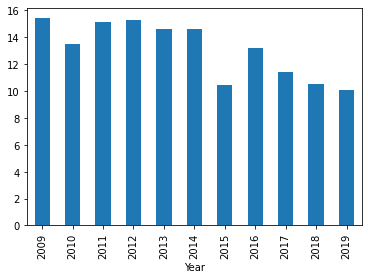

In [30]:
meanPricePerYear.plot( kind="bar")

# 5. Rating
## Weighted Rating
Last but not least we can look at the rating, but we have to pay attentation to the relationship between the rating and the number of reviews. For this we will use the weighted rating.

In [31]:
grp_data = df.groupby(['Book', 'Author', 'Genre'], as_index = False)[['Rating', 'Reviews']].mean()
grp_data = grp_data[grp_data['Reviews']>5000]
grp_data = grp_data.sort_values('Rating', ascending=False).head(10)
grp_data

,Book,Author,Genre,Rating,Reviews
112,Hamilton: The Revolution,Lin-Manuel Miranda,Non Fiction,4.9,5867.0
330,Unfreedom of the Press,Mark R. Levin,Non Fiction,4.9,5956.0
312,The Wonderful Things You Will Be,Emily Winfield Martin,Fiction,4.9,8842.0
68,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,Fiction,4.9,7235.0
69,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,Fiction,4.9,12619.0
70,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,Fiction,4.9,9089.0
71,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,Fiction,4.9,5470.0
208,Strange Planet (Strange Planet Series),Nathan W. Pyle,Fiction,4.9,9382.0
66,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,Fiction,4.9,5062.0
120,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,Fiction,4.9,10052.0


## Weighted Rating

In [32]:
minReview = min(df['Reviews'])
C = df['Rating'].mean()
def weighted_rating(x, m=minReview, C=C):
    v = x['Reviews']
    R = x['Rating']
    return (v/(v+m)*R) + (m/(m+v)*C)

In [33]:
df['Weighted Rating'] = df.apply(weighted_rating, axis=1)

In [34]:
weightedRating = df.groupby(['Book','Author','Genre'], as_index=False)[['Rating', 'Reviews', 'Weighted Rating']].mean().sort_values(by='Weighted Rating', ascending=False).head(10)

In [35]:
weightedRating

,Book,Author,Genre,Rating,Reviews,Weighted Rating
178,"Oh, the Places You'll Go!",Dr. Seuss,Fiction,4.9,21834.0,4.899524
116,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,Fiction,4.9,19622.0,4.899470
140,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,Non Fiction,4.9,19576.0,4.899469
310,The Very Hungry Caterpillar,Eric Carle,Fiction,4.9,19546.0,4.899468
36,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,Fiction,4.9,14344.0,4.899275
69,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,Fiction,4.9,12619.0,4.899177
151,Last Week Tonight with John Oliver Presents A ...,Jill Twiss,Fiction,4.9,11881.0,4.899126
120,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,Fiction,4.9,10052.0,4.898967
349,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,Fiction,4.9,9413.0,4.898897
208,Strange Planet (Strange Planet Series),Nathan W. Pyle,Fiction,4.9,9382.0,4.898894


# Summary

- non fiction books were more expensive than fiction books
- fiction books rated higher on average
- fiction books are reviewed more than non fiction books
- Jeff Kinney with 12 books in this list
- The highest price for one book was 105 USD

This is only a short demonstration and I think I will improve this Kernel in the future!